[QuantumRegister(5, 'q')]
[Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)]
circuit composition: {'cx': 8, 'h': 1}


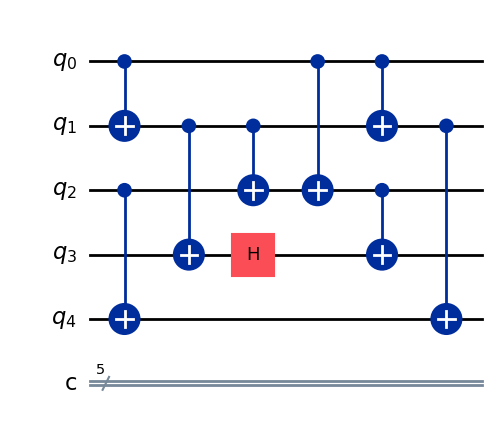

In [836]:
from qiskit import qasm2
from qiskit.dagcircuit import DAGOpNode, DAGInNode, DAGOutNode
from qiskit.converters import circuit_to_dag

program = '''
    OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[5];
    creg c[5];

    cx q[0], q[1];
    cx q[2], q[4];
    cx q[1], q[3];
    h q[3];
    cx q[1], q[2];
    cx q[0], q[2];
    cx q[0], q[1];
    cx q[2], q[3];
    cx q[1], q[4];
'''
filepath = "./benchmark/sabre_CXonly_bench/small/alu-v0_27_CXonly.qasm"

# circ = qasm2.loads(program)
circ = qasm2.load(filepath)

nQubit = len(circ.qubits)
print(circ.qregs)
print(circ.qubits)
nGate = len(circ.data)
# for gate in circ:
#     print(gate)
#     print(gate[0])
    
print("circuit composition:", dict(circ.count_ops()))

# circ.draw(output='mpl')

In [837]:
dag = circuit_to_dag(circ)
print(isinstance(dag.qubits, list))
# dag.qubits.sort()
# print("topological nodes: ")
# for node in dag.topological_nodes():
#     if isinstance(node, DAGOpNode):
#         print(f"{node.op.name}{node.qargs}")
#     elif isinstance(node, DAGInNode):
#         print(f"DAGInNode {node.wire}")
#     elif isinstance(node, DAGOutNode):
#         print(f"DAGOutNode {node.wire}")

# print("topological op nodes: ")
# for node in dag.topological_op_nodes():
#     print(f"{node.op.name}{node.qargs}")

for idx, node in enumerate(dag.op_nodes()):
    print(f"{idx}.\t{node.op.name}{node.qargs}")

True
0.	cx(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1))
1.	cx(Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 4))
2.	cx(Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 3))
3.	h(Qubit(QuantumRegister(5, 'q'), 3),)
4.	cx(Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2))
5.	cx(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 2))
6.	cx(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1))
7.	cx(Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3))
8.	cx(Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 4))


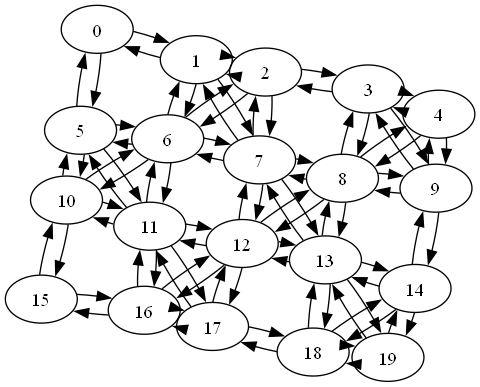

In [838]:
from utils import BACKENDS
from qiskit.transpiler import CouplingMap

backend = "tokyo"
coupling_map = CouplingMap(couplinglist=BACKENDS[backend].edges())
coupling_map.make_symmetric()
num_coupling_qubit = coupling_map.size()

coupling_map.draw()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


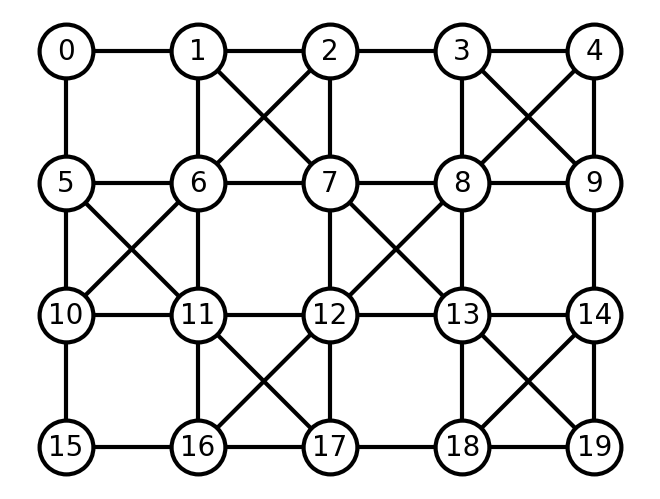

In [839]:
import networkx as nx
import matplotlib.pyplot as plt

G = BACKENDS[backend]
pos = nx.spring_layout(G, iterations=500, seed=39775555)
pos2 = nx.circular_layout(G)
pos3 = nx.kamada_kawai_layout(G)
pos4 = nx.random_layout(G)
pos5 = nx.shell_layout(G)
pos6 = nx.spectral_layout(G)
print(G.nodes())
pos7 = dict()
for i, n in enumerate(G.nodes()):
    if i // 5 == 0:
        pos7[n] = (i % 5, 0)
    elif i // 5 == 1:
        pos7[n] = (i % 5, -1)
    elif i // 5 == 2:
        pos7[n] = (i % 5, -2)
    elif i // 5 == 3:
        pos7[n] = (i % 5, -3)

# labeldict = {x: ""}

options = {
    "font_size": 20,
    "node_size": 1500,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "with_labels": True
}
nx.draw(G, pos7, **options)
# nx.draw_networkx(G, pos7)

# ax = plt.gca()
# ax.margins(0.20)
# plt.axis("off")
# plt.show()

In [840]:
import networkx as nx

# for edge in coupling_map.get_edges():
#     print(edge)
ag = BACKENDS[backend]
for neigh in nx.all_neighbors(ag, 2):
    print(neigh)
print(coupling_map.get_edges())
print(type(coupling_map.get_edges()))

1
3
7
6
EdgeList[(0, 1), (0, 5), (1, 2), (1, 6), (1, 7), (2, 3), (2, 7), (2, 6), (3, 4), (3, 8), (3, 9), (4, 9), (4, 8), (5, 6), (5, 10), (5, 11), (6, 7), (6, 11), (6, 10), (7, 8), (7, 12), (7, 13), (8, 9), (8, 13), (8, 12), (9, 14), (10, 11), (10, 15), (11, 12), (11, 16), (11, 17), (12, 13), (12, 17), (12, 16), (13, 14), (13, 18), (13, 19), (14, 19), (14, 18), (15, 16), (16, 17), (17, 18), (18, 19), (1, 0), (5, 0), (2, 1), (6, 1), (7, 1), (3, 2), (7, 2), (6, 2), (4, 3), (8, 3), (9, 3), (9, 4), (8, 4), (6, 5), (10, 5), (11, 5), (7, 6), (11, 6), (10, 6), (8, 7), (12, 7), (13, 7), (9, 8), (13, 8), (12, 8), (14, 9), (11, 10), (15, 10), (12, 11), (16, 11), (17, 11), (13, 12), (17, 12), (16, 12), (14, 13), (18, 13), (19, 13), (19, 14), (18, 14), (16, 15), (17, 16), (18, 17), (19, 18)]
<class 'rustworkx.EdgeList'>


In [841]:
print(coupling_map.graph.has_edge(3, 19))
print(coupling_map.graph.has_edge(3, 6))
p0 = coupling_map.neighbors(12)[0]
print(p0)
print(coupling_map.shortest_undirected_path(12, p0))
print(coupling_map.shortest_undirected_path(1, 14))
for qubit in coupling_map.shortest_undirected_path(1, 14):
    print(qubit, end='. ')
print("")
print(coupling_map.shortest_undirected_path(14, 1))

False
False
7
NodeIndices[12, 7]
NodeIndices[1, 7, 13, 14]
1. 7. 13. 14. 
NodeIndices[14, 13, 7, 1]


In [842]:
for node in coupling_map.physical_qubits:
    print(f"neighbors of {node}: {coupling_map.neighbors(node)}")
    if 1 not in coupling_map.neighbors(node):
        print(f"1 is not neighbor of {node}")

neighbors of 0: NodeIndices[1, 5]
neighbors of 1: NodeIndices[7, 2, 0, 6]
1 is not neighbor of 1
neighbors of 2: NodeIndices[7, 1, 3, 6]
neighbors of 3: NodeIndices[2, 8, 9, 4]
1 is not neighbor of 3
neighbors of 4: NodeIndices[8, 3, 9]
1 is not neighbor of 4
neighbors of 5: NodeIndices[10, 0, 6, 11]
1 is not neighbor of 5
neighbors of 6: NodeIndices[2, 1, 10, 7, 5, 11]
neighbors of 7: NodeIndices[2, 1, 12, 8, 6, 13]
neighbors of 8: NodeIndices[7, 12, 3, 13, 9, 4]
1 is not neighbor of 8
neighbors of 9: NodeIndices[8, 3, 14, 4]
1 is not neighbor of 9
neighbors of 10: NodeIndices[15, 6, 5, 11]
1 is not neighbor of 10
neighbors of 11: NodeIndices[12, 10, 16, 6, 17, 5]
1 is not neighbor of 11
neighbors of 12: NodeIndices[7, 8, 16, 13, 17, 11]
1 is not neighbor of 12
neighbors of 13: NodeIndices[7, 12, 8, 18, 19, 14]
1 is not neighbor of 13
neighbors of 14: NodeIndices[18, 19, 9, 13]
1 is not neighbor of 14
neighbors of 15: NodeIndices[10, 16]
1 is not neighbor of 15
neighbors of 16: NodeIn

In [843]:
from qiskit.transpiler.layout import Layout

layout = Layout({5: dag.qubits[3]})
print(layout)
print(5 in layout.get_physical_bits())
# print(isinstance(layout.get_physical_bits().keys(), list))
print(layout.get_virtual_bits())

Layout({
5: Qubit(QuantumRegister(5, 'q'), 3)
})
True
{Qubit(QuantumRegister(5, 'q'), 3): 5}


In [844]:

layout = Layout.generate_trivial_layout(dag.qregs['q'])
for gate in dag.op_nodes():
    v0, v1 = gate.qargs
    p0, p1 = (layout._v2p[v] for v in gate.qargs)
    print(f"{v0}({p0}), {v1}({p1})")

Qubit(QuantumRegister(5, 'q'), 0)(0), Qubit(QuantumRegister(5, 'q'), 1)(1)
Qubit(QuantumRegister(5, 'q'), 2)(2), Qubit(QuantumRegister(5, 'q'), 4)(4)
Qubit(QuantumRegister(5, 'q'), 1)(1), Qubit(QuantumRegister(5, 'q'), 3)(3)


ValueError: not enough values to unpack (expected 2, got 1)